# Feature Transformation

### Handle missing value

In [2]:
# Sample DataFrame
import pandas as pd
import numpy as np

data = {
    'Age': [25, 30, np.nan, 35, 40, np.nan, 45],
    'Salary': [50000, np.nan, 70000, np.nan, 90000, 120000, 110000],
    'Gender': ['Male', 'Female', np.nan, 'Female', 'Male', 'Male', np.nan],
    'Experience': [1, 3, 5, np.nan, 10, 15, np.nan]
}

df = pd.DataFrame(data)
print("Original DataFrame with Missing Values:")
print(df)

Original DataFrame with Missing Values:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0       NaN  Female         3.0
2   NaN   70000.0     NaN         5.0
3  35.0       NaN  Female         NaN
4  40.0   90000.0    Male        10.0
5   NaN  120000.0    Male        15.0
6  45.0  110000.0     NaN         NaN


In [3]:
print(df.isnull().sum())  # Shows count of missing values per column

Age           2
Salary        2
Gender        2
Experience    2
dtype: int64


In [4]:
# Remove missing values

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)



DataFrame after dropping rows with missing values:
    Age   Salary Gender  Experience
0  25.0  50000.0   Male         1.0
4  40.0  90000.0   Male        10.0


### Impute Missing value

In [5]:
# Impute missing values with the mean
df_mean = df
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
df_mean['Salary'].fillna(df_mean['Salary'].mean(), inplace=True)
df_mean['Experience'].fillna(df_mean['Experience'].mean(), inplace=True)

print("\nDataFrame after imputing numerical columns with mean:")
print(df_mean)


DataFrame after imputing numerical columns with mean:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0     NaN         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0     NaN         6.8


C:\Users\SHARMA\AppData\Local\Temp\ipykernel_9008\1109794949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
C:\Users\SHARMA\AppData\Local\Temp\ipykernel_9008\1109794949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [6]:
# Impute missing values with the mode
df_mode = df
df_mode['Gender'].fillna(df_mode['Gender'].mode()[0], inplace=True)


print("\nDataFrame after imputing categorical columns with mode:")
print(df_mode)


DataFrame after imputing categorical columns with mode:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0    Male         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0    Male         6.8


C:\Users\SHARMA\AppData\Local\Temp\ipykernel_9008\1188966738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Gender'].fillna(df_mode['Gender'].mode()[0], inplace=True)


### Handeling Categorical Value

In [7]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Price': [10, 20, 15, 18, 25],
    'Color': ['Red', 'Blue', None, 'Green', 'Red'],
    'Size': [None, 'M', 'L', 'S', 'M']
})


df['Color'] = df['Color'].fillna(df['Color'].mode()[0])  # Most frequent value
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])  # Most frequent value

print(df)

   Price  Color Size
0     10    Red    M
1     20   Blue    M
2     15    Red    L
3     18  Green    S
4     25    Red    M


In [8]:
# Label Encoding  vs ordinal Encoding 

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Size'
label_encoder = LabelEncoder()
df['Size'] = label_encoder.fit_transform(df['Size'])

print("\nDataFrame after Label Encoding for 'Size':\n", df)



DataFrame after Label Encoding for 'Size':
    Price  Color  Size
0     10    Red     1
1     20   Blue     1
2     15    Red     0
3     18  Green     2
4     25    Red     1


In [9]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['Color'])],  # Use column names
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(df)

# Convert back to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=feature_names)

print(df_encoded)

   onehot__Color_Blue  onehot__Color_Green  onehot__Color_Red  \
0                 0.0                  0.0                1.0   
1                 1.0                  0.0                0.0   
2                 0.0                  0.0                1.0   
3                 0.0                  1.0                0.0   
4                 0.0                  0.0                1.0   

   remainder__Price  remainder__Size  
0              10.0              1.0  
1              20.0              1.0  
2              15.0              0.0  
3              18.0              2.0  
4              25.0              1.0  


### Feature Scaling

In [10]:
import numpy as np
import pandas as pd

# Creating a dataset with different types of values
np.random.seed(42)
data = {
    'Feature_1': np.random.randint(10, 100, 10),    # Random integers (positive)
    'Feature_2': np.random.randn(10) * 10,         # Normally distributed values
    'Feature_3': np.random.exponential(5, 10),     # Skewed data (exponential)
    'Feature_4': np.random.randint(-50, 50, 10),   # Positive & Negative values
    'Feature_5': [5, 10, 15, 1000, 20, 25, 30, 35, 40, 45]  # Outlier in the middle
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

Original Dataset:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0         61  -8.852303   0.238948         22          5
1         24  -4.121885  18.201498        -12         10
2         81  -4.826188   1.324852        -33         15
3         70   1.641648   0.474887        -47       1000
4         30   2.330952   4.816728         38         20
5         92   1.179946   2.410073          9         25
6         96  14.623781  20.441083        -37         30
7         84  15.387150   3.143946        -42         35
8         84 -24.391058   9.828436         39         40
9         97   6.034412   5.701979          2         45


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scalers
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)

# Log Transformation (Handling zero by adding 1)
df_log = np.log1p(df)

# Display results
print("\nStandard Scaled Data:\n", df_standard)
print("\nMinMax Scaled Data:\n", df_minmax)
print("\nRobust Scaled Data:\n", df_robust)
print("\nMaxAbs Scaled Data:\n", df_maxabs)
print("\nLog Transformed Data:\n", df_log)



Standard Scaled Data:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  -0.439070  -0.795715  -0.930574   0.900525  -0.401358
1  -1.929492  -0.365681   1.673370  -0.189078  -0.384279
2   0.366563  -0.429708  -0.773156  -0.862069  -0.367200
3  -0.076535   0.158271  -0.896371  -1.310729   2.997374
4  -1.687802   0.220935  -0.266956   1.413280  -0.350121
5   0.809662   0.116299  -0.615837   0.483912  -0.333042
6   0.970788   1.338453   1.998032  -0.990257  -0.315962
7   0.487408   1.407850  -0.509451  -1.150493  -0.298883
8   0.487408  -2.208314   0.459568   1.445327  -0.281804
9   1.011070   0.557610  -0.138625   0.259582  -0.264725

MinMax Scaled Data:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.506849   0.390635   0.000000   0.802326   0.000000
1   0.000000   0.509555   0.889141   0.406977   0.005025
2   0.780822   0.491849   0.053752   0.162791   0.010050
3   0.630137   0.654446   0.011679   0.000000   1.000000
4   0.082192   0.671775   0.226599   0.988

c:\Users\SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


### Handling Outliers

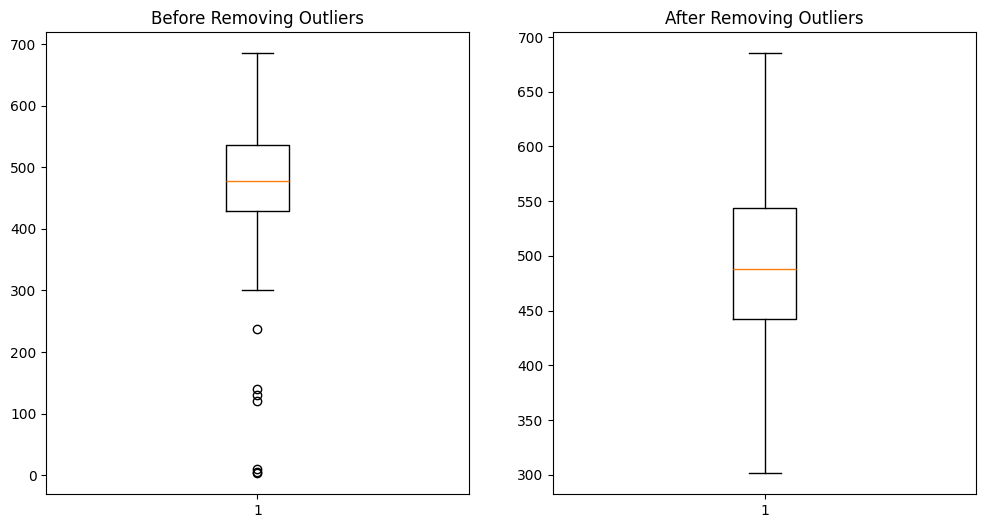

Data after removing outliers:
        Value
0  549.671415
1  486.173570
2  564.768854
3  652.302986
4  476.584663


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(42)
data = np.random.normal(loc=500, scale=100, size=100)  # Normal distribution

# Add extreme outliers (including very low values)
outliers = np.array([10, 120, 130, 5, 140, 3])
data_with_outliers = np.concatenate([data, outliers])

# Convert to DataFrame
df = pd.DataFrame({'Value': data_with_outliers})

# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered['Value'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers:")
print(df_filtered.head())

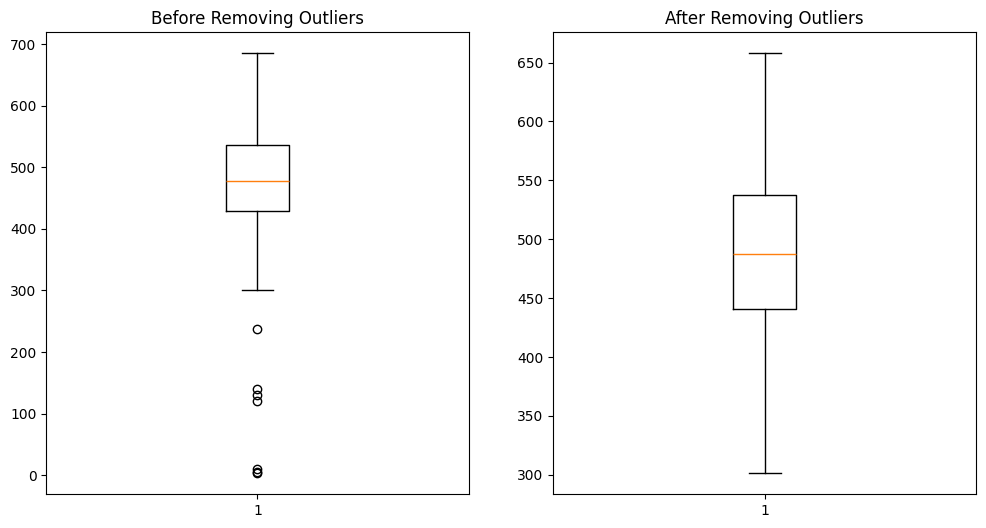

Data after removing outliers (Z-score method):
        Value
0  549.671415
1  486.173570
2  564.768854
3  652.302986
4  476.584663


In [13]:
from sklearn.preprocessing import StandardScaler

# Reshape data for scaling
data_reshaped = df[['Value']].values  

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(data_reshaped)

# Define a threshold (commonly 3)
threshold = 1.5
df_filtered_z = df[np.abs(z_scores) < threshold]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered_z['Value'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers (Z-score method):")
print(df_filtered_z.head())

## Housing data featured Engineering

In [15]:
import pandas as pd

def load_housing_data(HOUSING_PATH):
 return pd.read_csv(HOUSING_PATH)

housing = load_housing_data("./housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
# Handling Text and Categorical Attributes

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [18]:
housing_new = housing.drop(columns=['ocean_proximity'])

In [19]:
corr_matrix = housing_new.corr()
# check the correlation in descending order
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Feature Construction

In [20]:
# creating own features and  check whether its correlation
housing_new["rooms_per_household"] = housing_new["total_rooms"]/housing_new["households"]
housing_new["bedrooms_per_room"] = housing_new["total_bedrooms"]/housing_new["total_rooms"]
housing_new["population_per_household"]=housing_new["population"]/housing_new["households"]


# checking over the correlation of median house price with other features
corr_matrix = housing_new.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [21]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[["ocean_proximity"]]

In [23]:
# Define the target and features
X = housing.drop('median_house_value', axis=1)  # Features (exclude target)
y = housing['median_house_value']  # Target


In [24]:
# Define numerical and categorical columns
housing_num = X.select_dtypes(include=['float64', 'int64']).columns
housing_cat = X.select_dtypes(include=['object']).columns

# Print out the column names to verify
print("Numerical columns:", housing_num)
print("Categorical columns:", housing_cat)

Numerical columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Categorical columns: Index(['ocean_proximity'], dtype='object')


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer

## Define the numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale the numerical features
])

# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, housing_num),  # Apply num_pipeline to numerical columns
    ('cat', cat_pipeline, housing_cat)   # Apply cat_pipeline to categorical columns
])


In [26]:
# Apply the transformation to the features (X)
X_transformed = preprocessor.fit_transform(X)

# Convert the result into a DataFrame (optional for better readability)
# Get the transformed column names for both numerical and categorical data
num_columns = housing_num
cat_columns = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(housing_cat)

# Combine column names and create a new DataFrame for the transformed data
all_columns = list(num_columns) + list(cat_columns)
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

# Display the transformed dataset
print(X_transformed_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0   -0.974429   -0.977033       2.344766                        0.0   
1    0.861439    1.669961       2.332238                        0.0   
2   -0.820777   -0.843637       1.782699                        0.0   
3   -0.766028   -0.733781       0.932968                        0.0   
4   -0.759847   -0.629157      -0.012881                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                  

### Feature Selection

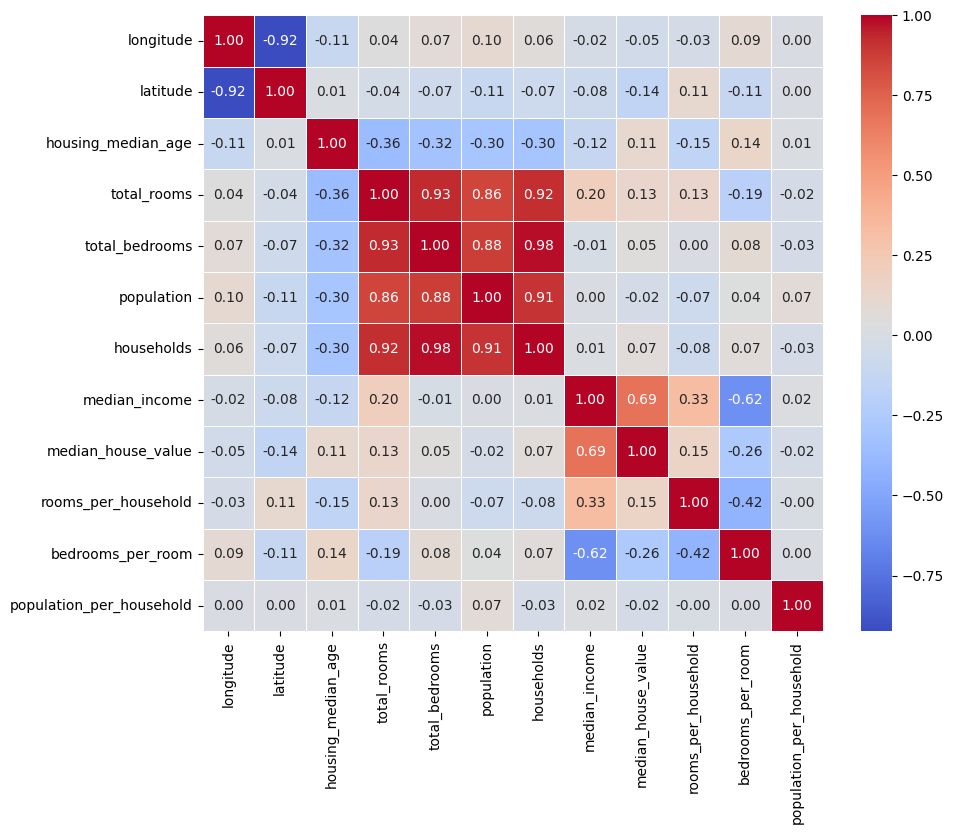

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = housing_new.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

In [28]:
X = X_transformed_df

from sklearn.linear_model import LassoCV 
from sklearn.model_selection import train_test_split
# Create a LassoCV model
lasso = LassoCV(cv=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the model to the training data
lasso.fit(X_train, y_train)


# Print the best alpha value chosen by cross-validation
print(f"Best alpha: {lasso.alpha_}")
# Get the features selected by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print(f"Selected features: {selected_features}")

Best alpha: 80.0394442061082
Selected features: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


### Principal Component Analysis(PCA)

In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./housing.csv")  # Replace with actual dataset path
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_house_value'], errors='ignore')  # Drop target if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)


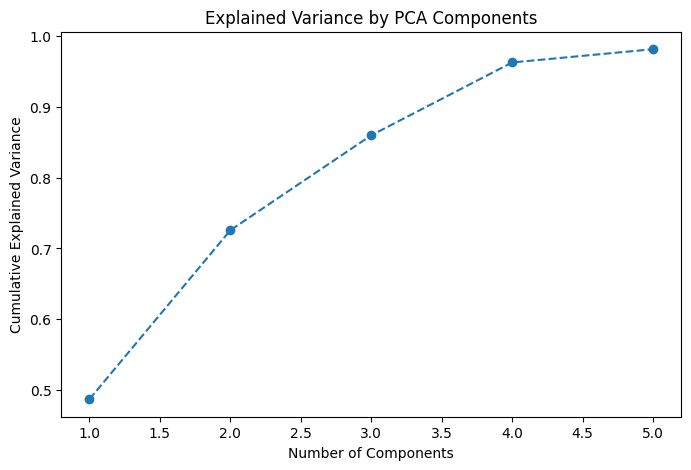

In [32]:
# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()


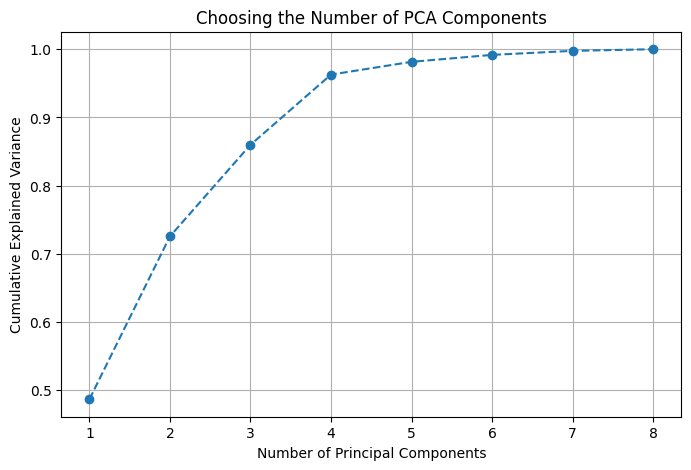

In [33]:
# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()

In [34]:
# Find the number of components that explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


pca = PCA(n_components=optimal_components)
pca

Optimal number of components: 4


PCA(n_components=np.int64(4))